In [289]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

plt.rc('axes', axisbelow=True)

In [207]:
import sklearn
sklearn.__version__

'0.21.3'

In [67]:
# задание 1. Баггинг
data = pd.read_csv('glass.csv').drop('Id', axis=1)
X_all = data.iloc[:, :-1].to_numpy()
Y_all = data.iloc[:, -1].to_numpy()

X, X_t, Y, Y_t = train_test_split(X_all, Y_all, test_size=0.2, shuffle=True)

In [78]:
model_svm = SVC(kernel='rbf', gamma=1.)
model_tree = DecisionTreeClassifier(min_samples_split=.035)
model_bayes = GaussianNB()
model_knn = KNeighborsClassifier(n_neighbors=2)

models = [ (model_svm, 'SVM'), (model_tree, 'Tree'), (model_knn, 'kNN') ]
numbers = [i for i in range(1, 21)]

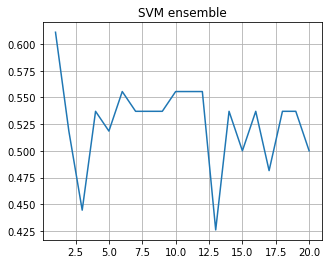

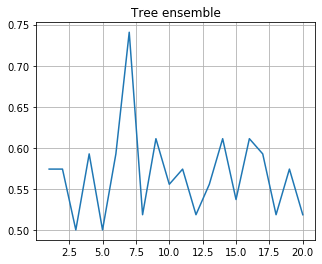

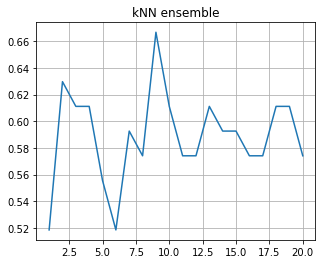

In [79]:
for model, name in models:
    accs = []
    for classifiers_num in numbers:
        if (classifiers_num > 1):
            split_ratio = 1. / classifiers_num + 0.2
        else:
            split_ratio = 1.
        weights = [1. / split_ratio] * len(X)
        ensemble = BaggingClassifier(base_estimator=model, n_estimators=classifiers_num, 
                                     max_samples=split_ratio, n_jobs=4)
        ensemble.fit(X, Y)
        preds = ensemble.predict(X_t)
        accs.append(accuracy_score(preds, Y_t))

    fix, ax = plt.subplots(1, 1, figsize=(5,4))
    ax.plot(numbers, accs)
    ax.set_title(f'{name} ensemble')
    plt.grid(True)
    plt.show()

In [41]:
len(X_t)

43

In [43]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [48]:
for i in range(len(data)):
    for j in range(len(data)):
        if (i != j) and (data.iloc[i, :-1].equals(data.iloc[j, :-1])):
            print(f'i = {i}, j = {j}')

i = 38, j = 39
i = 39, j = 38


In [50]:
data.iloc[38:39+1]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [97]:
# Adaboost
data2 = pd.read_csv('vehicle.csv')
X_all = data2.iloc[:, :-1].to_numpy()
Y_all = LabelEncoder().fit_transform(data2.iloc[:, -1].to_numpy())

X, X_t, Y, Y_t = train_test_split(X_all, Y_all, test_size=0.2, shuffle=True)

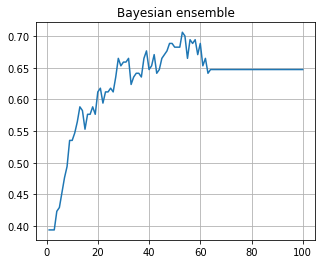

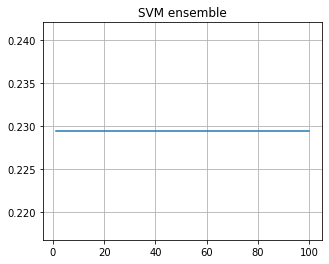

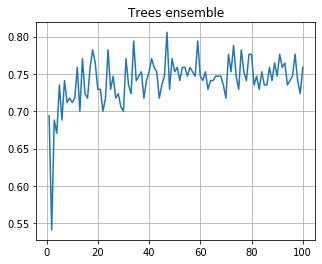

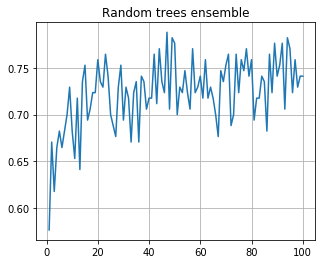

In [101]:
model_tree = DecisionTreeClassifier(min_samples_split=.035)
model_ex_tree = ExtraTreeClassifier(min_samples_split=.035)
model_bayes = GaussianNB()
model_svm = SVC(kernel='rbf', gamma=1.)

models = [ (model_bayes, 'Bayesian'), (model_svm, 'SVM'), (model_tree, 'Trees'), (model_ex_tree, 'Random trees') ]
numbers = [i for i in range(1, 101)]


for model, name in models:
    accs = []
    for classifiers_num in numbers:
        if (classifiers_num > 1):
            split_ratio = 1. / classifiers_num + 0.2
        else:
            split_ratio = 1.
        weights = [1. / split_ratio] * len(X)
        ensemble = AdaBoostClassifier(base_estimator=model, n_estimators=classifiers_num, algorithm='SAMME')
        ensemble.fit(X, Y)
        #preds = ensemble.predict(X_t)
        #accs.append(accuracy_score(preds, Y_t))
        accs.append(ensemble.score(X_t, Y_t))

    fix, ax = plt.subplots(1, 1, figsize=(5,4))
    ax.plot(numbers, accs)
    ax.set_title(f'{name} ensemble')
    plt.grid(True)
    plt.show()

In [100]:
from collections import Counter
Counter(data2.iloc[:, -1])

Counter({'van': 199, 'saab': 217, 'bus': 218, 'opel': 212})

In [215]:
# Стацкинг

data3 = pd.read_csv('titanic.csv').drop(['PassengerId', 'Name', 'Ticket', 'Fare'], axis=1)
data3['Cabin'].fillna('Z', inplace=True)
data3.dropna(axis=0, inplace=True)
data3.index = [i for i in range(len(data3))]


for i in range(len(data3)):
    data3.at[i, 'Cabin'] = data3.loc[i, 'Cabin'][0]
    if (data3.at[i, 'Sex'] == 'male'):
        data3.at[i, 'Sex'] = 1
    else:
        data3.at[i, 'Sex'] = 0

data3 = pd.get_dummies(data3, columns=['Cabin', 'Embarked'])
data3 

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_Z,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
1,1,1,0,38.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,3,0,26.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1,1,0,35.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,3,1,35.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0,3,0,39.0,0,5,0,0,0,0,0,0,0,0,1,0,1,0
708,0,2,1,27.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
709,1,1,0,19.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
710,1,1,1,26.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [216]:
X_all = data3.iloc[:, 1:].to_numpy()
Y_all = data3.iloc[:, 0].to_numpy()

X, X_test, Y, Y_test = train_test_split(X_all, Y_all, test_size=0.2, shuffle=True)
X_basic, X_meta, Y_basic, Y_meta = train_test_split(X, Y, test_size=0.4, shuffle=True)

In [280]:
from keras.models import Sequential
from keras.layers import Dense


small_models = [  GaussianNB(), 
                  GaussianNB(), 
                  GaussianNB(), 
                  GaussianNB(), 
                  GaussianNB(), 
                  DecisionTreeClassifier(min_samples_split=.035), 
                  DecisionTreeClassifier(min_samples_split=.035), 
                  DecisionTreeClassifier(min_samples_split=.035), 
                  DecisionTreeClassifier(min_samples_split=.035), 
                  DecisionTreeClassifier(min_samples_split=.035) ]

final_model = Sequential([ Dense(10, input_dim=10, activation='tanh'), 
                           Dense(5, activation='tanh'), 
                           Dense(1, activation='tanh') ])
final_model.compile(loss='mse', optimizer='rmsprop', metrics=['accuracy'])

# small models training
for model in small_models:
    small_X, _, small_Y, _ = train_test_split(X_basic, Y_basic, test_size=0.7, shuffle=True)
    model.fit(small_X, small_Y)
    print(model.score(small_X, small_Y))

# meta-model training
preds = small_models[0].predict(X_meta).reshape(len(X_meta),1)

for model in small_models[1:]:
    preds = np.concatenate((preds, model.predict(X_meta).reshape(len(X_meta),1)), axis=1)
    
final_model.fit(preds, Y_meta, epochs=50)

0.7352941176470589
0.7549019607843137
0.7647058823529411
0.49019607843137253
0.7549019607843137
0.9411764705882353
0.9509803921568627
0.9607843137254902
0.9313725490196079
0.9215686274509803
Epoch 1/50
228/228 [==============================] - 0s 372us/step - loss: 0.6039 - accuracy: 0.5000
Epoch 2/50
228/228 [==============================] - 0s 82us/step - loss: 0.4273 - accuracy: 0.5439
Epoch 3/50
228/228 [==============================] - 0s 79us/step - loss: 0.3313 - accuracy: 0.5351
Epoch 4/50
228/228 [==============================] - 0s 60us/step - loss: 0.2813 - accuracy: 0.5570
Epoch 5/50
228/228 [==============================] - 0s 77us/step - loss: 0.2497 - accuracy: 0.6009
Epoch 6/50
228/228 [==============================] - 0s 55us/step - loss: 0.2374 - accuracy: 0.6579
Epoch 7/50
228/228 [==============================] - 0s 43us/step - loss: 0.2282 - accuracy: 0.6711
Epoch 8/50
228/228 [==============================] - 0s 89us/step - loss: 0.2193 - accuracy: 0.6842


In [294]:
# overall ensamble evaluating
def ensamble_predict(small_models, final_model, X_data):
    preds = small_models[0].predict(X_data).reshape(len(X_data),1)

    for model in small_models[1:]:
        preds = np.concatenate((preds, model.predict(X_data).reshape(len(X_data),1)), axis=1)
    
    final_preds = final_model.predict(preds).reshape((len(X_data)))
    return np.round(final_preds).astype('int')

Y_preds = ensamble_predict(small_models, final_model, X_test)    

In [300]:
Y_preds 

conf_matr = pd.DataFrame(confusion_matrix(Y_test, Y_preds))
print(f'Точность ансамбля: {accuracy_score(Y_test, Y_preds):.3f}')
conf_matr

Точность ансамбля: 0.832


,0,1
0,72,10
1,14,47


In [302]:
sample_model = GaussianNB()
sample_model.fit(X, Y)
Y_preds2 = sample_model.predict(X_test)
conf_matr = pd.DataFrame(confusion_matrix(Y_test, Y_preds2))
print(f'Точность байесовского классификатора: {accuracy_score(Y_test, Y_preds2):.3f}')
conf_matr

Точность ансамбля: 0.769


,0,1
0,59,23
1,10,51


In [303]:
sample_model = DecisionTreeClassifier(min_samples_split=.035)
sample_model.fit(X, Y)
Y_preds2 = sample_model.predict(X_test)
conf_matr = pd.DataFrame(confusion_matrix(Y_test, Y_preds2))
print(f'Точность дерева: {accuracy_score(Y_test, Y_preds2):.3f}')
conf_matr

Точность ансамбля: 0.825


,0,1
0,74,8
1,17,44
